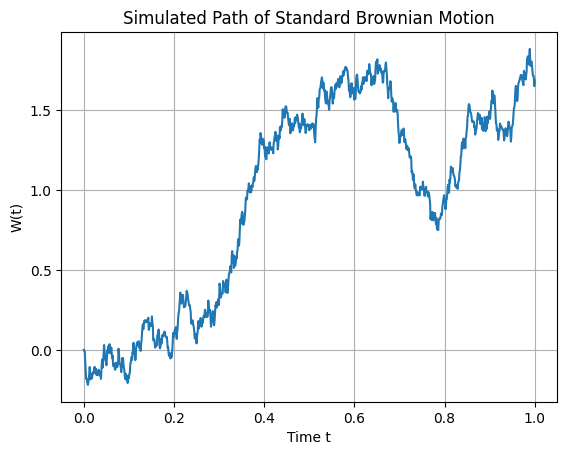

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0            # total time
N = 1000           # number of steps
dt = T / N         # time step size
t = np.linspace(0, T, N+1)  # time vector

# Simulate Brownian motion
dW = np.sqrt(dt) * np.random.randn(N)  # Gaussian increments
W = np.concatenate(([0], np.cumsum(dW)))  # W(0)=0, then cumulative sum

# Plot the path
plt.plot(t, W)
plt.title("Simulated Path of Standard Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


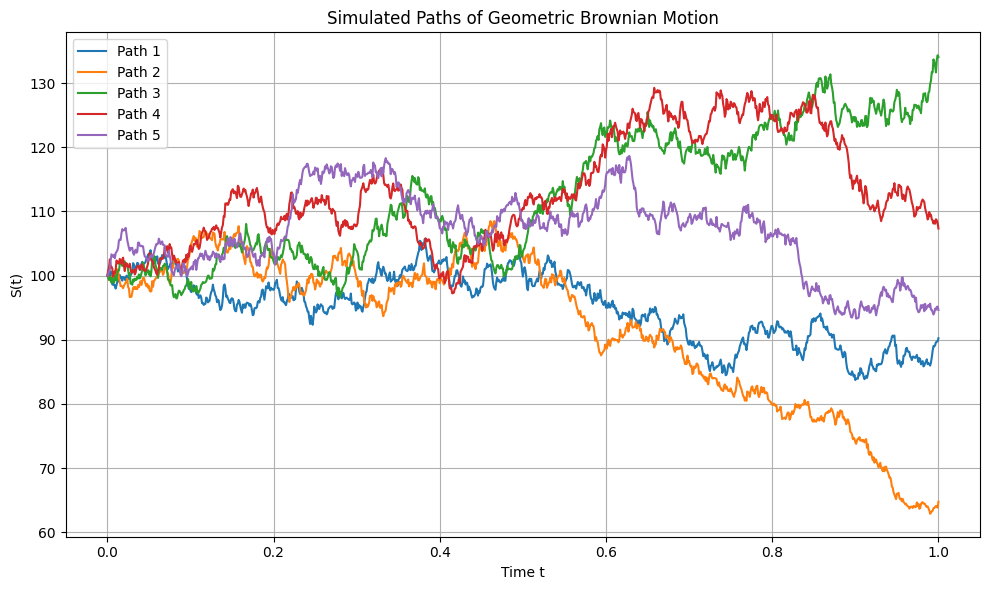

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm_paths(S0, alpha, sigma, T, N, n_paths, seed=None):
    """
    Simulate n_paths of a geometric Brownian motion.
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    paths = np.zeros((n_paths, N + 1))
    paths[:, 0] = S0

    rng = np.random.default_rng(seed)
    for i in range(n_paths):
        dW = rng.normal(0, np.sqrt(dt), size=N)
        W = np.concatenate(([0], np.cumsum(dW)))
        exponent = sigma * W + (alpha - 0.5 * sigma**2) * t
        paths[i] = S0 * np.exp(exponent)

    return t, paths

def plot_gbm_paths(t, paths):
    """
    Plot simulated GBM paths.
    """
    plt.figure(figsize=(10, 6))
    for i in range(paths.shape[0]):
        plt.plot(t, paths[i], label=f'Path {i+1}')
    plt.title('Simulated Paths of Geometric Brownian Motion')
    plt.xlabel('Time t')
    plt.ylabel('S(t)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


S0 = 100         # Initial value
alpha = 0.1      # Drift
sigma = 0.2      # Volatility
T = 1.0          # Time horizon
N = 1000         # Number of time steps
n_paths = 5      # Number of paths
seed = 42        # For reproducibility

t, paths = simulate_gbm_paths(S0, alpha, sigma, T, N, n_paths, seed)
plot_gbm_paths(t, paths)